In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


### Importing neccessary packages:

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_columns=81

**Importing Dataset:**

In [64]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
print(f"Train data shape :{train.shape}")
print(f"Test data shape :{test.shape}")

Train data shape :(1460, 81)
Test data shape :(1459, 80)


In [65]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **Drop Id feature:** 
    Its not important feature so we drop it

In [66]:
train = train.drop(columns=['Id'])

In [67]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

**Count Null values in percentage:** 

In [68]:
# how many null values in feature values
for feature in train.columns:
    print(f"{feature} : {np.round(train[feature].isnull().mean(),4)}")

MSSubClass : 0.0
MSZoning : 0.0
LotFrontage : 0.1774
LotArea : 0.0
Street : 0.0
Alley : 0.9377
LotShape : 0.0
LandContour : 0.0
Utilities : 0.0
LotConfig : 0.0
LandSlope : 0.0
Neighborhood : 0.0
Condition1 : 0.0
Condition2 : 0.0
BldgType : 0.0
HouseStyle : 0.0
OverallQual : 0.0
OverallCond : 0.0
YearBuilt : 0.0
YearRemodAdd : 0.0
RoofStyle : 0.0
RoofMatl : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.0055
MasVnrArea : 0.0055
ExterQual : 0.0
ExterCond : 0.0
Foundation : 0.0
BsmtQual : 0.0253
BsmtCond : 0.0253
BsmtExposure : 0.026
BsmtFinType1 : 0.0253
BsmtFinSF1 : 0.0
BsmtFinType2 : 0.026
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
TotalBsmtSF : 0.0
Heating : 0.0
HeatingQC : 0.0
CentralAir : 0.0
Electrical : 0.0007
1stFlrSF : 0.0
2ndFlrSF : 0.0
LowQualFinSF : 0.0
GrLivArea : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
FullBath : 0.0
HalfBath : 0.0
BedroomAbvGr : 0.0
KitchenAbvGr : 0.0
KitchenQual : 0.0
TotRmsAbvGrd : 0.0
Functional : 0.0
Fireplaces : 0.0
FireplaceQu : 0.4726
GarageType : 0

### **separating numerical feature :**

In [69]:
numerical_feature = {feature for feature in train.columns if train[feature].dtypes != 'O'}
print(f"Total no of Numerical feature : {len(numerical_feature)}")
print(f'Numerical Feature are: {numerical_feature}')

Total no of Numerical feature : 37
Numerical Feature are: {'OverallQual', 'YearRemodAdd', 'MiscVal', 'MasVnrArea', 'YrSold', 'PoolArea', 'OpenPorchSF', 'SalePrice', 'GrLivArea', 'WoodDeckSF', 'TotRmsAbvGrd', 'BsmtUnfSF', 'EnclosedPorch', '2ndFlrSF', 'BsmtHalfBath', 'BedroomAbvGr', 'GarageYrBlt', 'MSSubClass', 'GarageCars', 'MoSold', 'FullBath', '3SsnPorch', 'LotFrontage', 'TotalBsmtSF', 'Fireplaces', 'LotArea', 'KitchenAbvGr', 'BsmtFullBath', 'OverallCond', 'BsmtFinSF1', 'ScreenPorch', 'YearBuilt', 'LowQualFinSF', '1stFlrSF', 'HalfBath', 'GarageArea', 'BsmtFinSF2'}


In [70]:
discrete_feature = {feature for feature in numerical_feature if len(train[feature].unique())<25}
print(f'Total number of Discrete feature : {len(discrete_feature)}')
print(f"Discrete Feature are : {discrete_feature}")

Total number of Discrete feature : 18
Discrete Feature are : {'OverallQual', 'TotRmsAbvGrd', 'BsmtFullBath', 'MiscVal', 'OverallCond', '3SsnPorch', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'HalfBath', 'MSSubClass', 'YrSold', 'PoolArea', 'GarageCars', 'MoSold', 'Fireplaces', 'KitchenAbvGr', 'FullBath'}


In [71]:
continuous_feature = {feature for feature in numerical_feature if feature not in discrete_feature}
print(f'Total number of Discrete feature : {len(continuous_feature)}')
print(f"Discrete Feature are : {continuous_feature}")

Total number of Discrete feature : 19
Discrete Feature are : {'YearRemodAdd', 'MasVnrArea', 'SalePrice', 'OpenPorchSF', 'GrLivArea', 'WoodDeckSF', 'EnclosedPorch', 'BsmtUnfSF', '2ndFlrSF', 'GarageYrBlt', 'LotFrontage', 'TotalBsmtSF', 'LotArea', 'BsmtFinSF1', 'ScreenPorch', 'YearBuilt', '1stFlrSF', 'GarageArea', 'BsmtFinSF2'}


### **separating categorical feature:**

In [72]:
categorical_feature = {feature for feature in train.columns if train[feature].dtypes == 'O'}
print(f"Total no of Categorical feature : {len(categorical_feature)}")
print(f'Categorical Feature are: {categorical_feature}')

Total no of Categorical feature : 43
Categorical Feature are: {'RoofStyle', 'CentralAir', 'MasVnrType', 'MSZoning', 'Utilities', 'BsmtQual', 'HouseStyle', 'ExterCond', 'LotShape', 'BldgType', 'SaleCondition', 'BsmtCond', 'BsmtExposure', 'RoofMatl', 'Condition2', 'Fence', 'HeatingQC', 'Condition1', 'SaleType', 'Alley', 'GarageCond', 'GarageFinish', 'Exterior2nd', 'Street', 'GarageType', 'PavedDrive', 'Foundation', 'LotConfig', 'BsmtFinType2', 'FireplaceQu', 'BsmtFinType1', 'GarageQual', 'LandSlope', 'MiscFeature', 'LandContour', 'ExterQual', 'Functional', 'Heating', 'Neighborhood', 'KitchenQual', 'Exterior1st', 'Electrical', 'PoolQC'}


### Explotary Data Analysis:

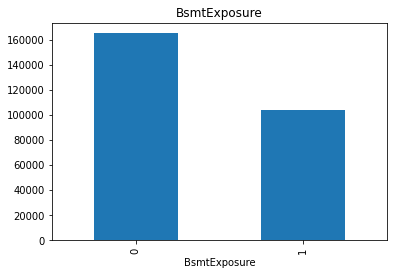

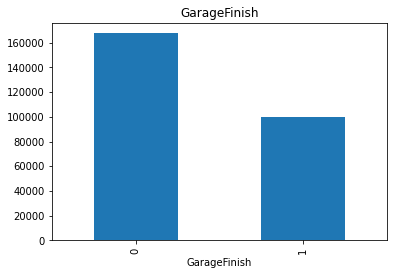

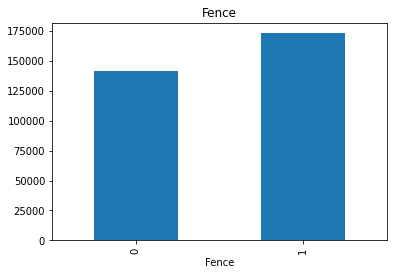

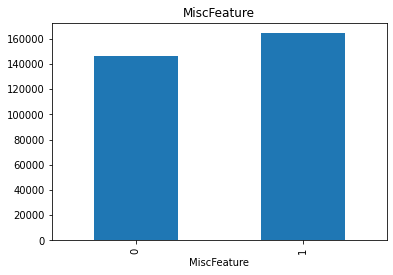

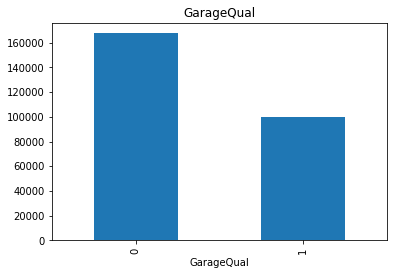

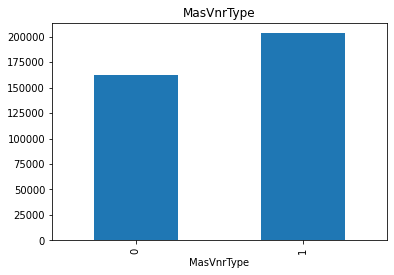

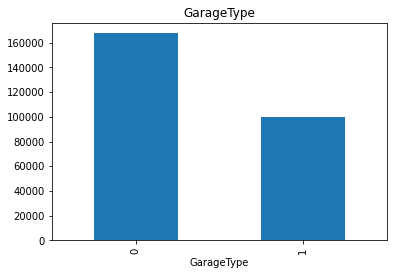

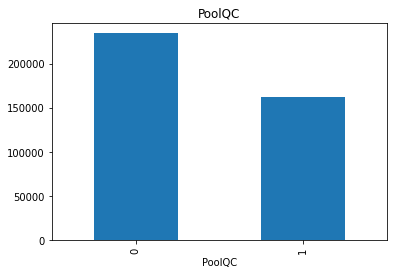

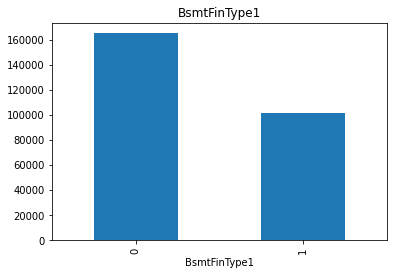

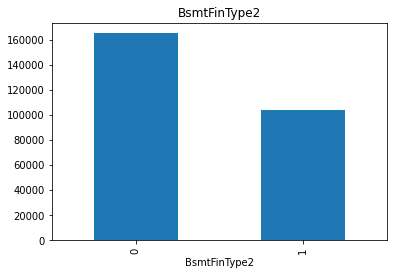

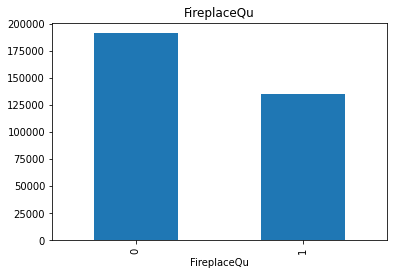

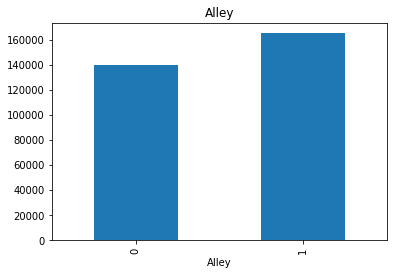

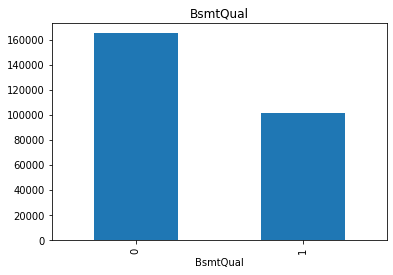

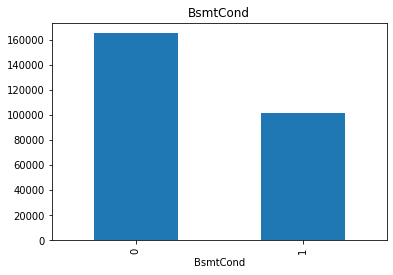

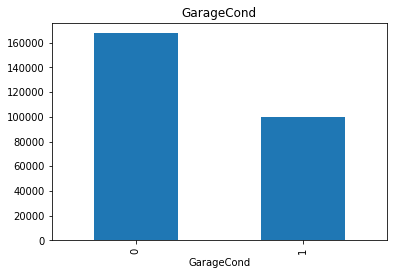

In [73]:
# Finding the relationship between the categorical feature with target feature
missing_value = {feature for feature in categorical_feature if train[feature].isnull().sum()>1}

for feature in missing_value:
    data = train.copy()
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(),1, 0)
    # let's calculate the mean SalePrice where the information is missing or present    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

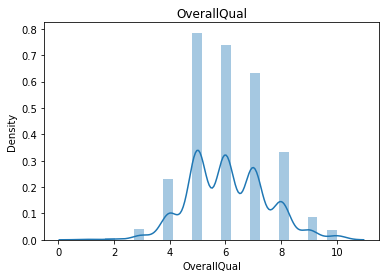

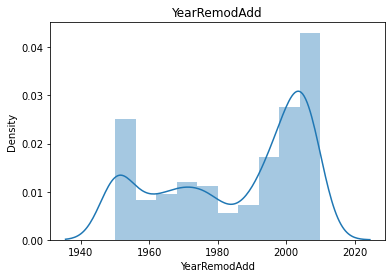

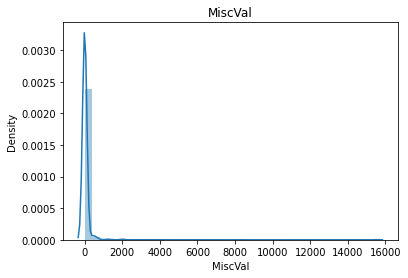

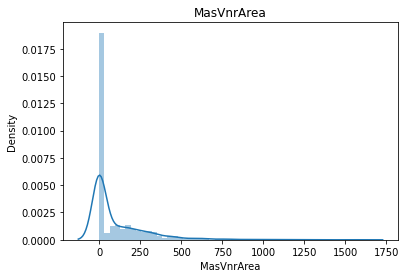

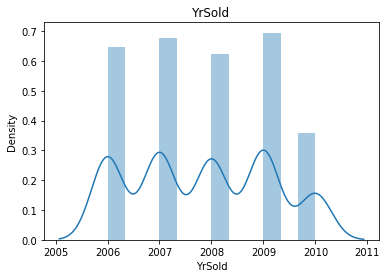

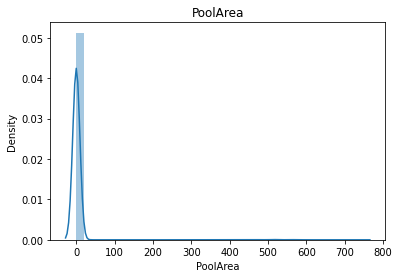

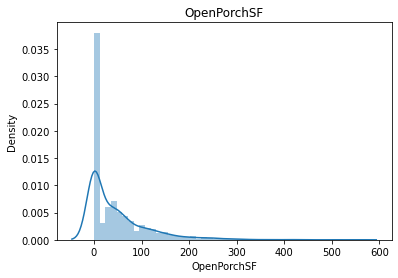

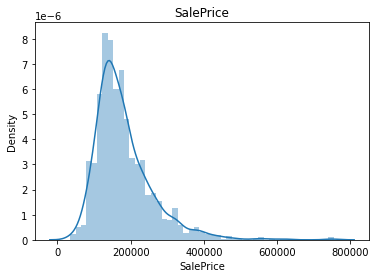

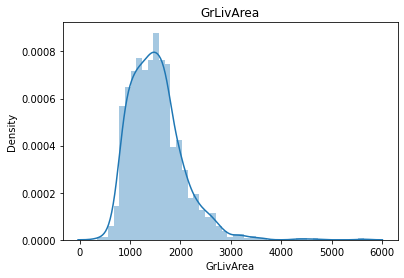

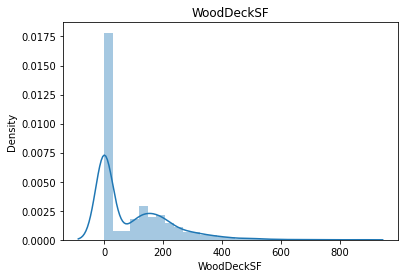

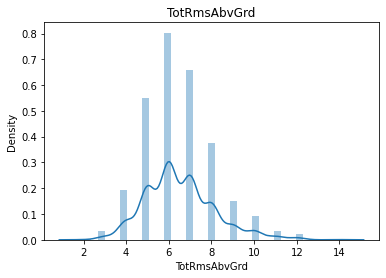

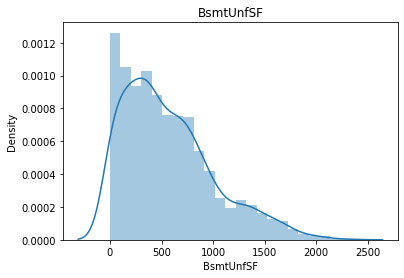

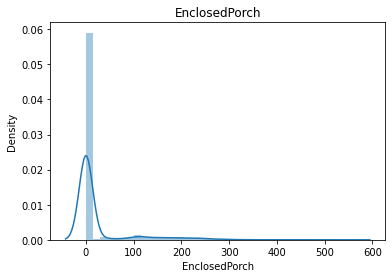

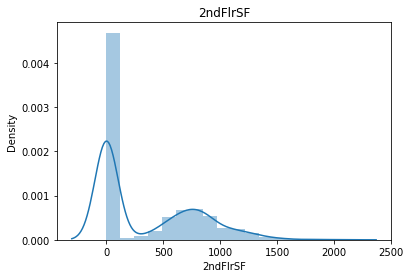

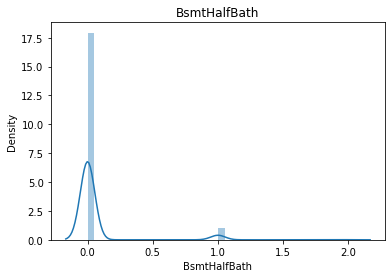

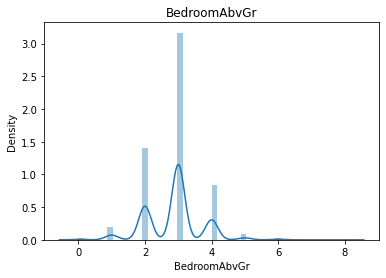

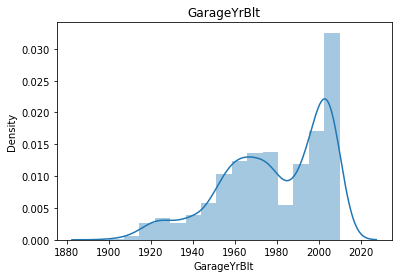

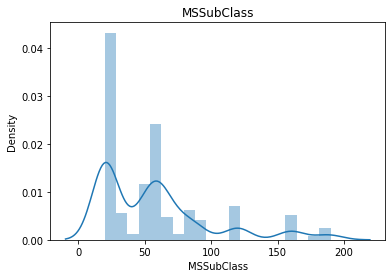

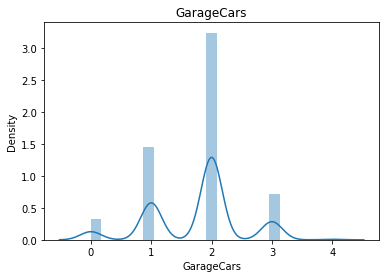

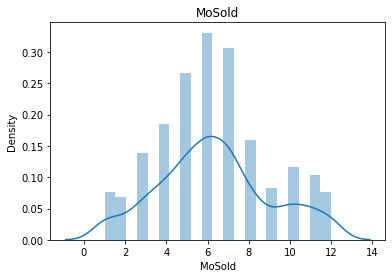

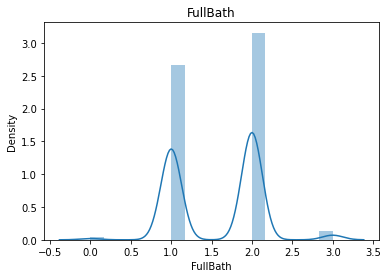

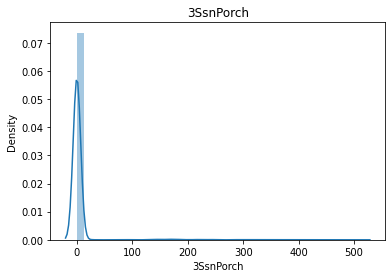

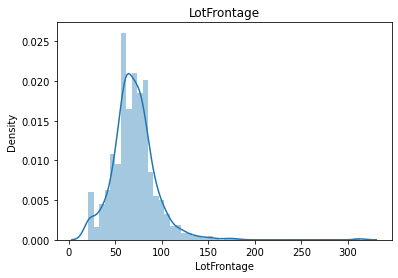

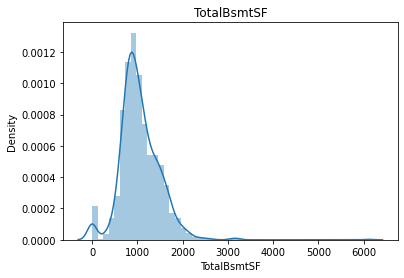

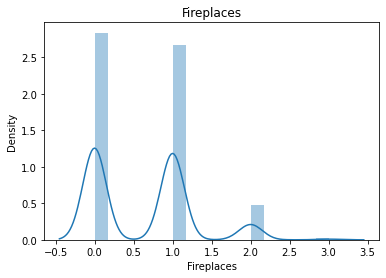

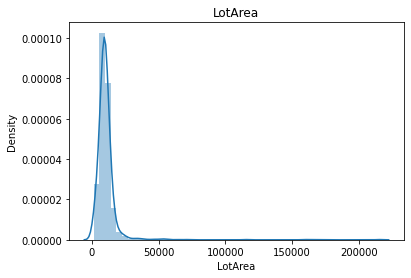

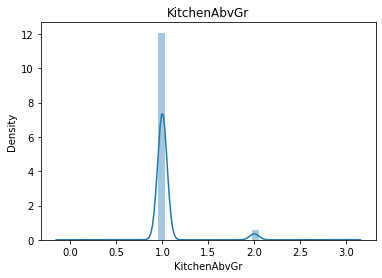

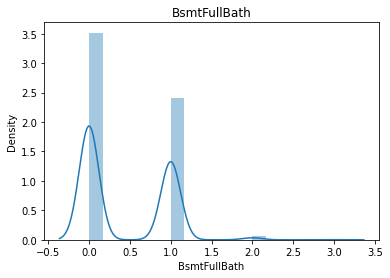

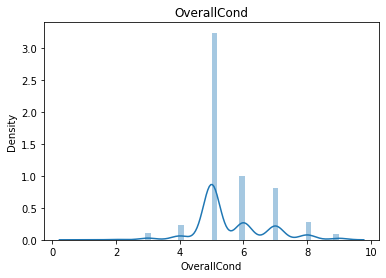

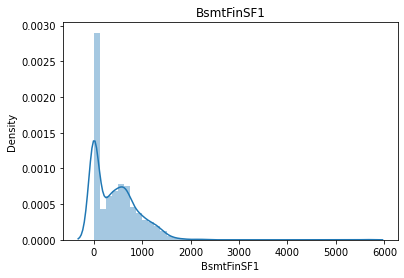

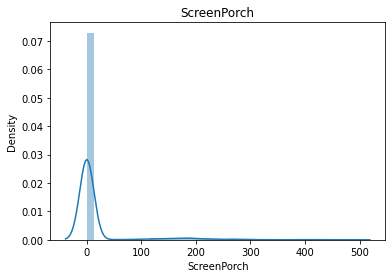

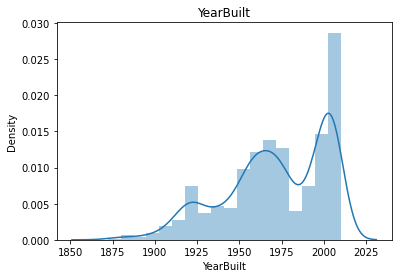

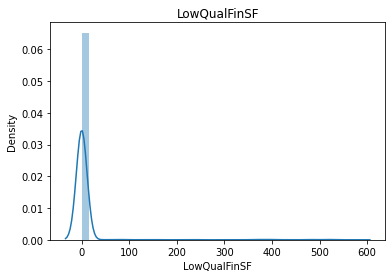

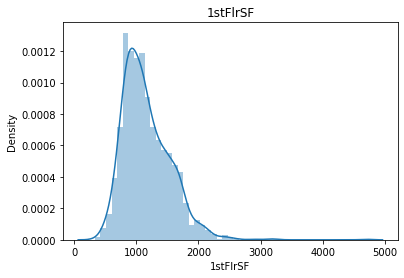

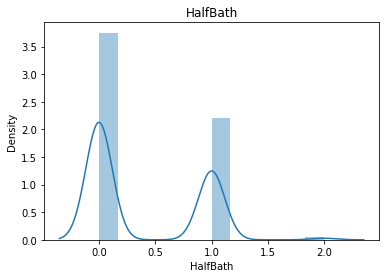

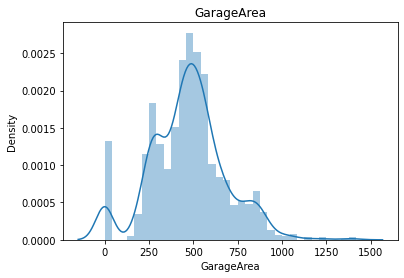

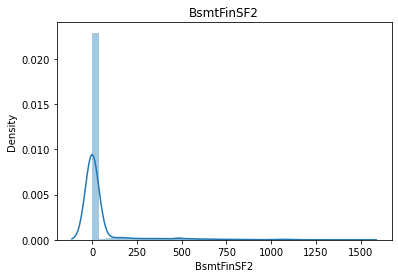

In [74]:
for feature in numerical_feature:
    data = train.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

**From this analysis, there is few features are in normal distriution other are not belongs to the Gaussian distribution, we want to convert those distribution into a Gaussian distributed**

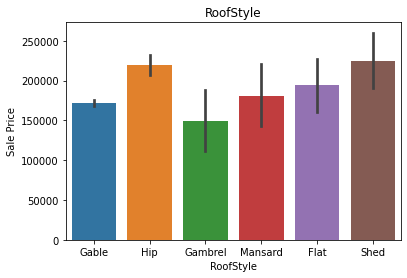

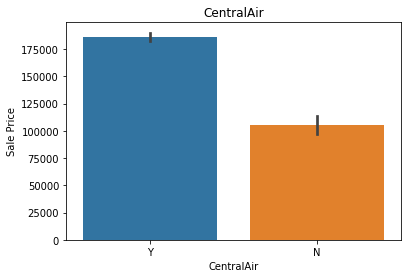

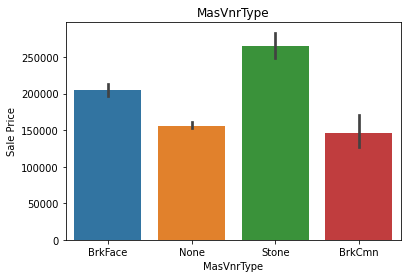

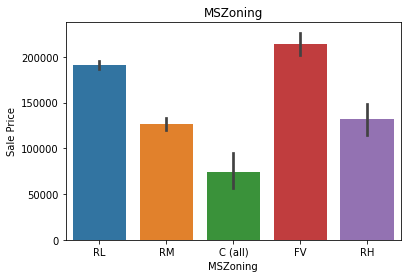

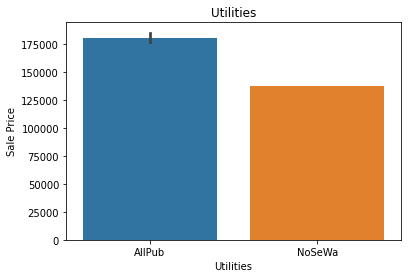

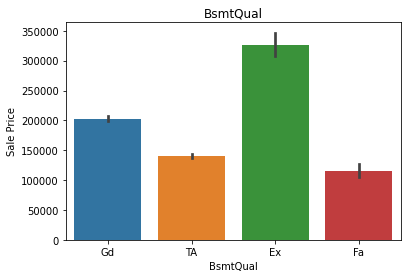

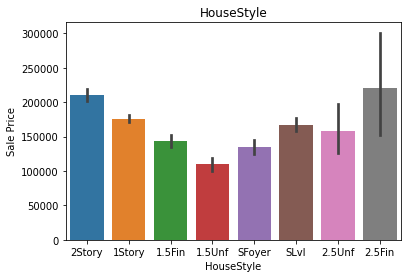

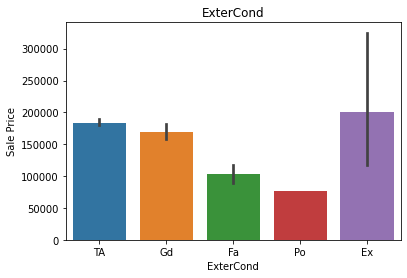

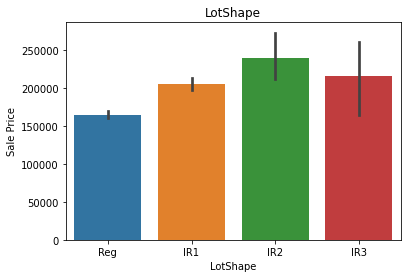

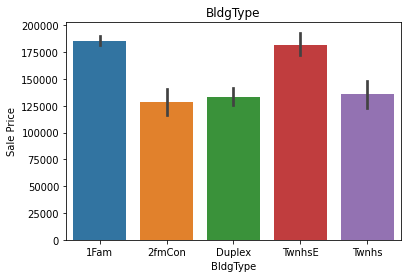

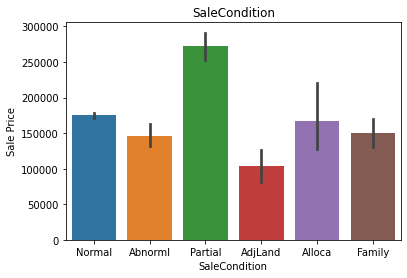

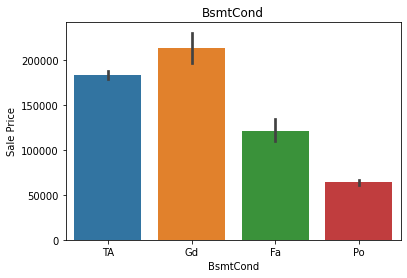

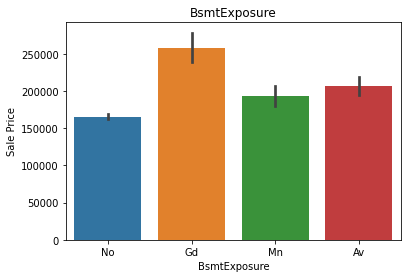

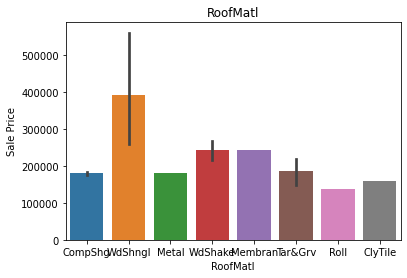

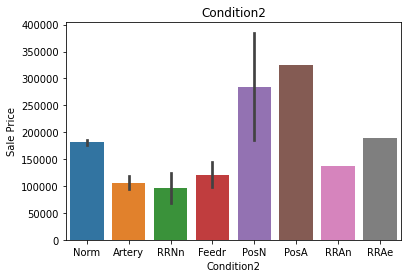

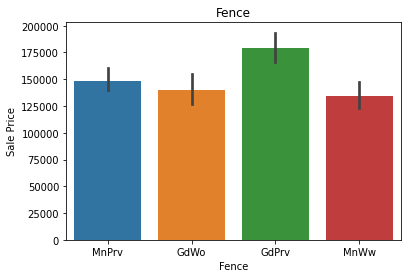

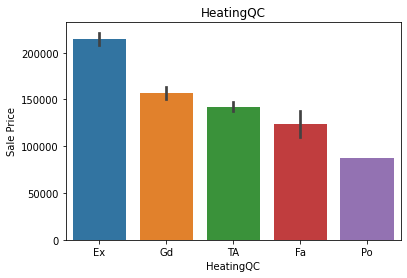

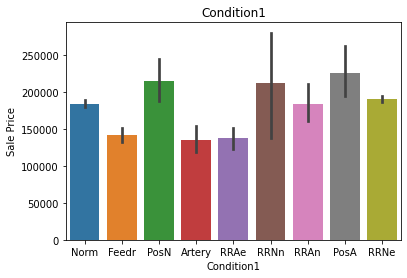

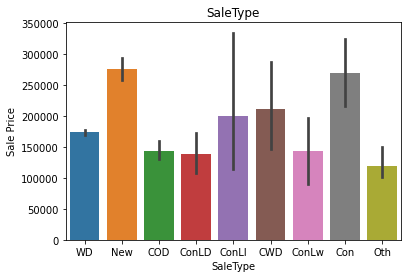

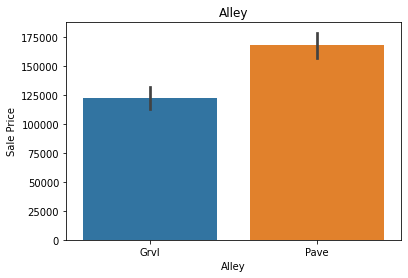

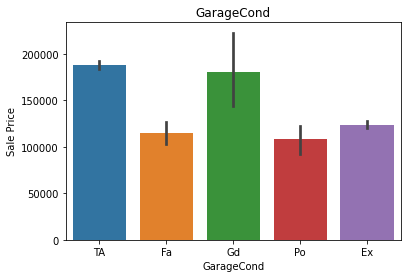

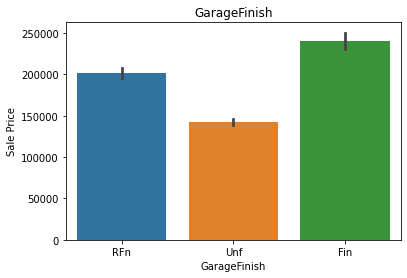

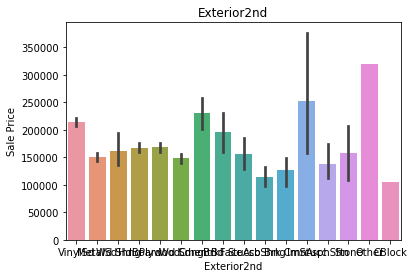

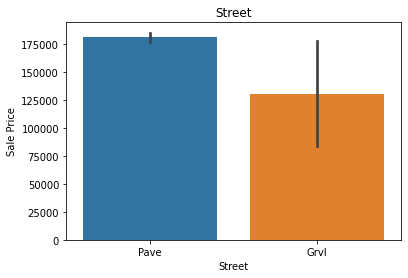

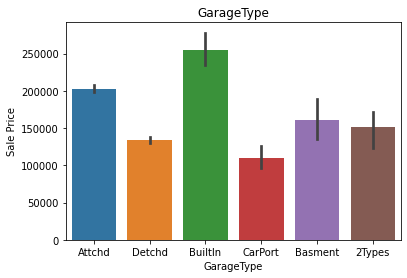

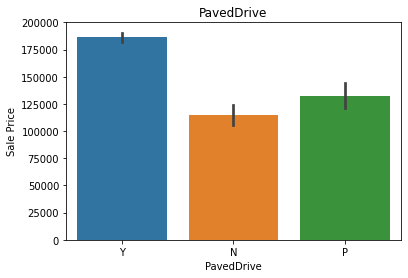

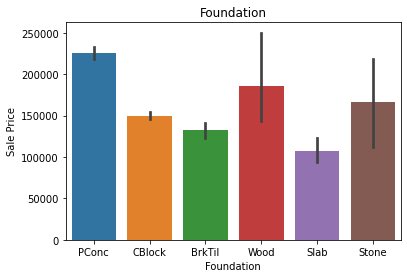

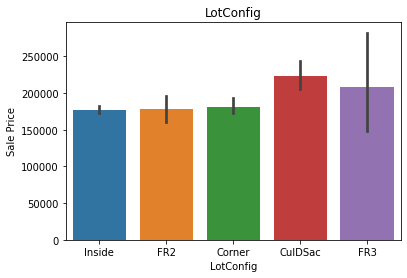

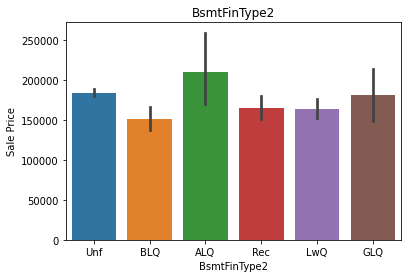

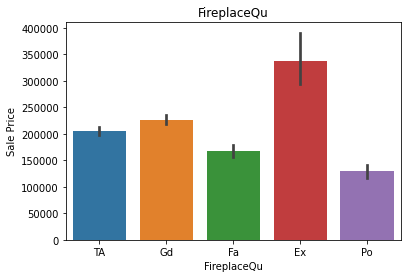

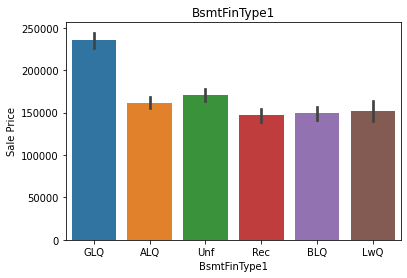

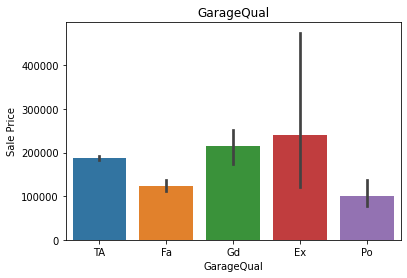

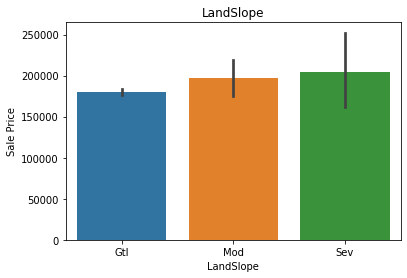

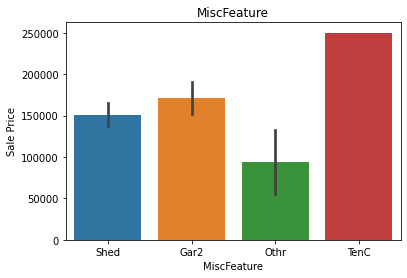

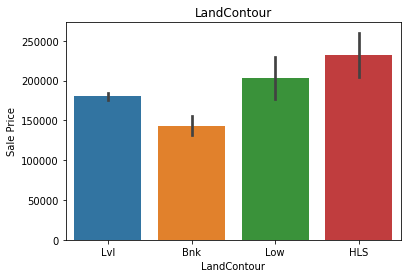

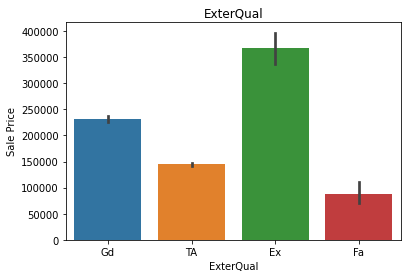

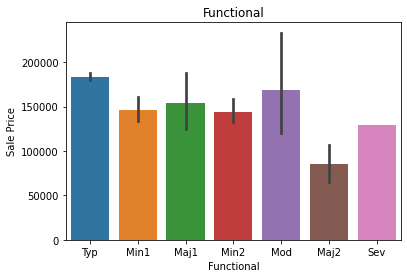

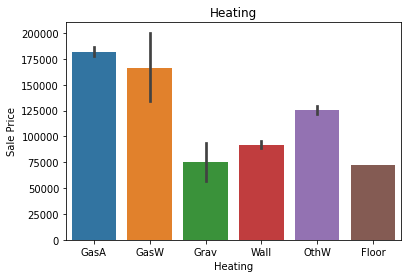

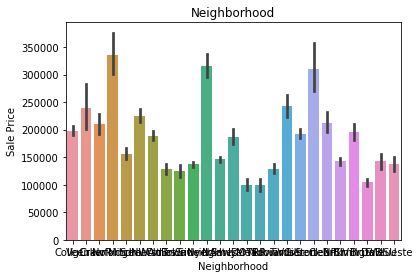

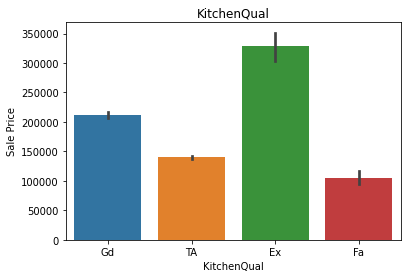

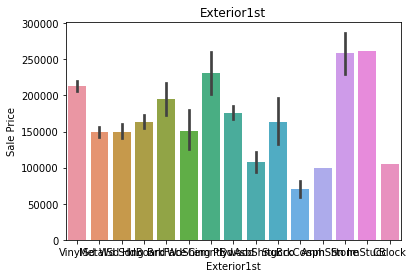

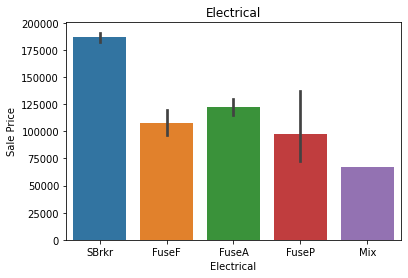

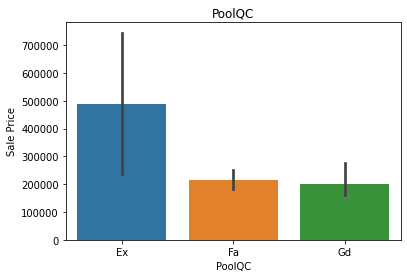

In [75]:
# plotting categorical value
for feature in categorical_feature:
    data = train.copy()
    sns.barplot(train[feature], train['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()

### **Find the correlation between dependent and independent feature:**

<AxesSubplot:>

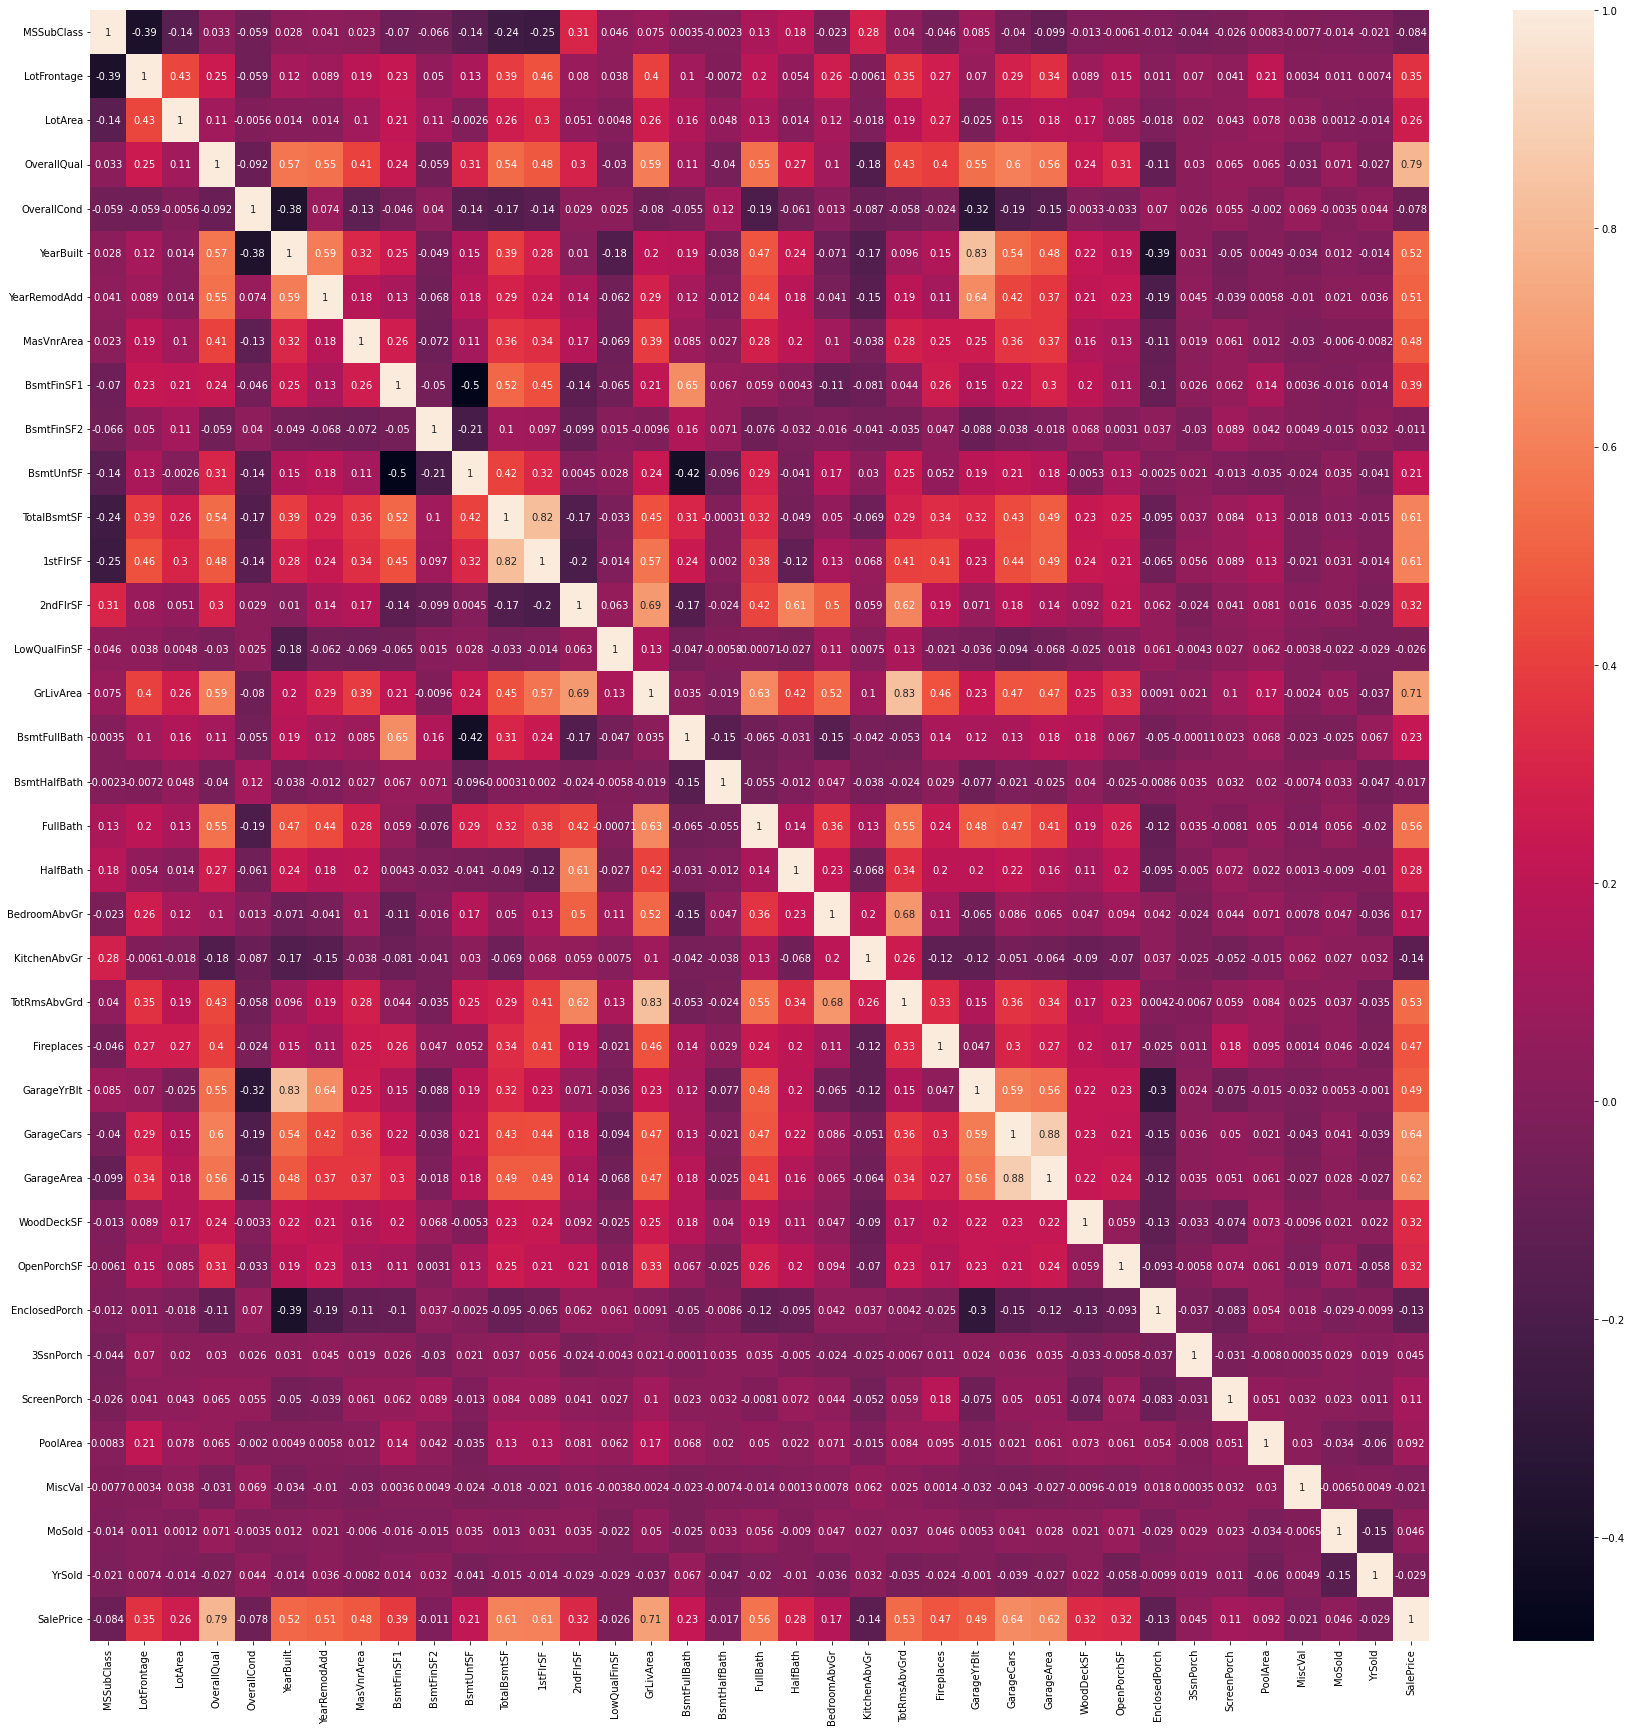

In [76]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(), annot=True)

### **Feature Engineering:** 
     In this process, cleaning all the null values with replace of mean, median, mode etc.. And replace informate values and its most important steps in machine learning. Convert the categorical feature with numerical feature for better accuray as well as fit the data into ml algorithm

In [77]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
for feature in train.columns:
    print(f"{feature} : {np.round(train[feature].isnull().mean(),2)}")

MSSubClass : 0.0
MSZoning : 0.0
LotFrontage : 0.18
LotArea : 0.0
Street : 0.0
Alley : 0.94
LotShape : 0.0
LandContour : 0.0
Utilities : 0.0
LotConfig : 0.0
LandSlope : 0.0
Neighborhood : 0.0
Condition1 : 0.0
Condition2 : 0.0
BldgType : 0.0
HouseStyle : 0.0
OverallQual : 0.0
OverallCond : 0.0
YearBuilt : 0.0
YearRemodAdd : 0.0
RoofStyle : 0.0
RoofMatl : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.01
MasVnrArea : 0.01
ExterQual : 0.0
ExterCond : 0.0
Foundation : 0.0
BsmtQual : 0.03
BsmtCond : 0.03
BsmtExposure : 0.03
BsmtFinType1 : 0.03
BsmtFinSF1 : 0.0
BsmtFinType2 : 0.03
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
TotalBsmtSF : 0.0
Heating : 0.0
HeatingQC : 0.0
CentralAir : 0.0
Electrical : 0.0
1stFlrSF : 0.0
2ndFlrSF : 0.0
LowQualFinSF : 0.0
GrLivArea : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
FullBath : 0.0
HalfBath : 0.0
BedroomAbvGr : 0.0
KitchenAbvGr : 0.0
KitchenQual : 0.0
TotRmsAbvGrd : 0.0
Functional : 0.0
Fireplaces : 0.0
FireplaceQu : 0.47
GarageType : 0.06
GarageYrBlt : 0.0

##### **Cleaning Null values in Numerical feature:** 

In [79]:
# replcing null values with median
for feature in numerical_feature:
    train[feature] = train[feature].fillna(train[feature].median())

In [80]:
# list of variables that contain year information
year_feature = {feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature}
for feature in year_feature:
    if feature!='YrSold':
        ## We will capture the difference between year variable and year the house was sold for
        train[feature]=train['YrSold']-train[feature]

In [81]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
# here we saw that there is no null value in numerical feature
for feature in numerical_feature:
    print(f"{feature} : {train[feature].isnull().sum()}")

OverallQual : 0
YearRemodAdd : 0
MiscVal : 0
MasVnrArea : 0
YrSold : 0
PoolArea : 0
OpenPorchSF : 0
SalePrice : 0
GrLivArea : 0
WoodDeckSF : 0
TotRmsAbvGrd : 0
BsmtUnfSF : 0
EnclosedPorch : 0
2ndFlrSF : 0
BsmtHalfBath : 0
BedroomAbvGr : 0
GarageYrBlt : 0
MSSubClass : 0
GarageCars : 0
MoSold : 0
FullBath : 0
3SsnPorch : 0
LotFrontage : 0
TotalBsmtSF : 0
Fireplaces : 0
LotArea : 0
KitchenAbvGr : 0
BsmtFullBath : 0
OverallCond : 0
BsmtFinSF1 : 0
ScreenPorch : 0
YearBuilt : 0
LowQualFinSF : 0
1stFlrSF : 0
HalfBath : 0
GarageArea : 0
BsmtFinSF2 : 0


#### **Replacing categorical null values with String values:**

In [83]:
for feature in categorical_feature:
    print(f"{feature}: {train[feature].value_counts()}")

RoofStyle: Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
CentralAir: Y    1365
N      95
Name: CentralAir, dtype: int64
MasVnrType: None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
MSZoning: RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Utilities: AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
BsmtQual: TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
HouseStyle: 1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
ExterCond: TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
LotShape: Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
BldgType: 1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: Bld

**From this analysis we saw that there is an imbalance in the categorical feature which the value counts is higher so we not recommended to replacing null values with most frequent values**

In [84]:
for feature in categorical_feature:
    train[feature] = np.where(train[feature].isnull(), 'Missing', train[feature])

In [85]:
for feature in categorical_feature:
    print(f"{feature}: {train[feature].isnull().sum()}")

RoofStyle: 0
CentralAir: 0
MasVnrType: 0
MSZoning: 0
Utilities: 0
BsmtQual: 0
HouseStyle: 0
ExterCond: 0
LotShape: 0
BldgType: 0
SaleCondition: 0
BsmtCond: 0
BsmtExposure: 0
RoofMatl: 0
Condition2: 0
Fence: 0
HeatingQC: 0
Condition1: 0
SaleType: 0
Alley: 0
GarageCond: 0
GarageFinish: 0
Exterior2nd: 0
Street: 0
GarageType: 0
PavedDrive: 0
Foundation: 0
LotConfig: 0
BsmtFinType2: 0
FireplaceQu: 0
BsmtFinType1: 0
GarageQual: 0
LandSlope: 0
MiscFeature: 0
LandContour: 0
ExterQual: 0
Functional: 0
Heating: 0
Neighborhood: 0
KitchenQual: 0
Exterior1st: 0
Electrical: 0
PoolQC: 0


In [86]:
train.isnull().sum().sum()

0

There is null values in our data, we cleaned all null values
### Convert Categorical features into Numerical Feature by Encoding methods  
    The train dataset was in an nominal categorical data, so we use nomical encoding methods to converts the categorical data into numerical values

In [87]:
LEncoder = LabelEncoder()
for feature in categorical_feature:
    train[feature] = LEncoder.fit_transform(train[feature])

**All the categorical feature are converted into numerical feature**

In [88]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,5.0,2,2,548,5,5,2,0,61,0,0,0,0,3,2,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,31.0,2,2,460,5,5,2,298,0,0,0,0,0,3,2,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,162.0,2,4,2,2,4,3,2,486,6,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,7.0,2,2,608,5,5,2,0,42,0,0,0,0,3,2,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,13,15,3,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,8.0,3,3,642,5,5,2,0,35,272,0,0,0,3,2,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,8.0,2,3,836,5,5,2,192,84,0,0,0,0,3,2,1,0,12,2008,8,4,250000


##### **Perform Lognormal distribution for the Numerical values which are not Normal distributed**

In [89]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train[feature]=np.log(train[feature])

In [90]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,4.174387,9.041922,1,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,3,1,5.0,2,2,548,5,5,2,0,61,0,0,0,0,3,2,1,0,2,2008,8,4,12.247694
1,20,3,4.382027,9.169518,1,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,6,1,5,1,31.0,2,2,460,5,5,2,298,0,0,0,0,0,3,2,1,0,5,2007,8,4,12.109011
2,60,3,4.219508,9.328123,1,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,162.0,2,4,2,2,4,3,2,486,6,0,434,920,1,0,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,5,1,7.0,2,2,608,5,5,2,0,42,0,0,0,0,3,2,1,0,9,2008,8,4,12.317167
3,70,3,4.094345,9.164296,1,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,13,15,3,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,5,8.0,3,3,642,5,5,2,0,35,272,0,0,0,3,2,1,0,2,2006,8,0,11.849398
4,60,3,4.430817,9.565214,1,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,5,1,8.0,2,3,836,5,5,2,192,84,0,0,0,0,3,2,1,0,12,2008,8,4,12.429216


### **Feature Scaling:**
    In this dataset, we use MinMaxScaler for better performance bcoz we dont have negative value so use range between 0 to 1

In [91]:
feature_scaling = {feature for feature in train.columns if 'SalePrice' not in feature}

In [92]:
MMS = MinMaxScaler()
MMS.fit(train)
MMS.transform(train)

array([[0.23529412, 0.75      , 0.41820812, ..., 1.        , 0.8       ,
        0.58143069],
       [0.        , 0.75      , 0.49506375, ..., 1.        , 0.8       ,
        0.53631912],
       [0.23529412, 0.75      , 0.434909  , ..., 1.        , 0.8       ,
        0.60402899],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.8       ,
        0.66126699],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.8       ,
        0.45677119],
       [0.        , 0.75      , 0.47117546, ..., 1.        , 0.8       ,
        0.46884616]])

**Apply Feature Selection.First, I specify the Lasso Regression model, and I select a suitable alpha (equivalent of penalty).The bigger the alpha the less features that will be selected.Then I use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero**

In [93]:
X_train = train.drop(['SalePrice'], axis=1)
y_train = train[['SalePrice']]

In [94]:
feature_selection = SelectFromModel(Lasso(alpha=0.005, random_state=0))# remember the random state in this function
feature_selection.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [95]:
feature_selection.get_support()

array([ True, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False,  True])

In [96]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feature = X_train.columns[(feature_selection.get_support())]

# let's print some stats
print(f'total features: {X_train.shape[1]}')
print(f'selected features: {len(selected_feature)}')

total features: 79
selected features: 45


In [97]:
selected_feature

Index(['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl',
       'Exterior1st', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MoSold', 'SaleCondition'],
      dtype='object')

In [98]:
X_train = X_train[selected_feature]
X_train.head()

,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleCondition
0,60,9.041922,3,5,5,7,5,5,5,1,12,196.0,2,4,4,2,706,0,150,856,0,6.752270,854,0,1,2,8,6,0,3,1,5.0,2,2,548,5,2,0,61,0,0,0,0,2,4
1,20,9.169518,3,24,2,6,8,31,31,1,8,0.0,2,4,1,0,978,0,284,1262,0,7.140453,0,0,0,3,6,6,1,5,1,31.0,2,2,460,5,2,298,0,0,0,0,0,5,4
2,60,9.328123,0,5,5,7,5,7,6,1,12,162.0,2,4,3,2,486,0,434,920,0,6.824374,866,0,1,2,6,6,1,5,1,7.0,2,2,608,5,2,0,42,0,0,0,0,9,4
3,70,9.164296,0,6,5,7,5,91,36,1,13,0.0,4,1,4,0,216,0,540,756,2,6.867974,756,0,1,2,7,6,1,2,5,8.0,3,3,642,5,2,0,35,272,0,0,0,2,0
4,60,9.565214,0,15,5,8,5,8,8,1,12,350.0,2,4,0,2,655,0,490,1145,0,7.043160,1053,0,1,2,9,6,1,5,1,8.0,2,3,836,5,2,192,84,0,0,0,0,12,4


In [99]:
y_train.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


### **Perform Same method to test data set**

In [100]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [101]:
numerical_feature = {feature for feature in test.columns if test[feature].dtypes != 'O'}
print(f"Total no of Numerical feature : {len(numerical_feature)}")
print(f'Numerical Feature are: {numerical_feature}')

Total no of Numerical feature : 37
Numerical Feature are: {'OverallQual', 'YearRemodAdd', 'Id', 'MiscVal', 'MasVnrArea', 'YrSold', 'PoolArea', 'OpenPorchSF', 'GrLivArea', 'WoodDeckSF', 'TotRmsAbvGrd', 'BsmtUnfSF', 'EnclosedPorch', '2ndFlrSF', 'BsmtHalfBath', 'BedroomAbvGr', 'GarageYrBlt', 'MSSubClass', 'GarageCars', 'MoSold', 'FullBath', '3SsnPorch', 'LotFrontage', 'TotalBsmtSF', 'Fireplaces', 'LotArea', 'KitchenAbvGr', 'BsmtFullBath', 'OverallCond', 'BsmtFinSF1', 'ScreenPorch', 'YearBuilt', 'LowQualFinSF', '1stFlrSF', 'HalfBath', 'GarageArea', 'BsmtFinSF2'}


In [102]:
# replcing null values with median
for feature in numerical_feature:
    test[feature] = test[feature].fillna(test[feature].median())
    

In [103]:
# list of variables that contain year information
year_feature = {feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature}
for feature in year_feature:
    if feature!='YrSold':
        ## We will capture the difference between year variable and year the house was sold for
        test[feature]=test['YrSold']-test[feature]

for feature in categorical_feature:
    test[feature] = np.where(test[feature].isnull(), 'Missing', test[feature])
    
# convert categorical data into numerical data
LEncoder = LabelEncoder()
for feature in categorical_feature:
    test[feature] = LEncoder.fit_transform(test[feature])

# Any distribution into Gaussian Distribution
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    test[feature]=np.log(test[feature])

# Feature scaling
MMS = MinMaxScaler()
MMS.fit(test)
MMS.transform(test)

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,4.382027,9.360655,1,1,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,11,13,3,0.0,3,4,1,4,4,4,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,4,5,7,0,3,1,49.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,3,1,0,6,2010,9,4
1,1462,20,4,4.394449,9.565704,1,1,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,12,14,1,108.0,3,4,1,4,4,4,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,7,0,3,1,52.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,2,0,12500,6,2010,9,4
2,1463,60,4,4.304065,9.534595,1,1,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,11,13,3,0.0,3,4,2,2,4,4,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,4,6,7,1,5,1,13.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,3,1,0,3,2010,9,4
3,1464,60,4,4.356709,9.208138,1,1,0,3,0,4,0,8,2,2,0,4,6,6,12,12,1,0,11,13,1,20.0,3,4,2,4,4,4,2,602.0,6,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,7,1,2,1,12.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,2,1,0,6,2010,9,4
4,1465,120,4,3.761200,8.518193,1,1,0,1,0,4,0,22,2,2,4,2,8,5,18,18,1,0,6,6,3,0.0,2,4,2,2,4,4,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,7,0,3,1,18.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,2,1,0,1,2010,9,4


In [104]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [108]:
test['SalePrice'] = submission.SalePrice
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,3,4.382027,9.360655,1,1,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,11,13,3,0.0,3,4,1,4,4,4,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,4,5,7,0,3,1,49.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,3,1,0,6,2010,9,4,169277.052498
1,1462,20,4,4.394449,9.565704,1,1,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,12,14,1,108.0,3,4,1,4,4,4,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,7,0,3,1,52.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,2,0,12500,6,2010,9,4,187758.393989
2,1463,60,4,4.304065,9.534595,1,1,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,11,13,3,0.0,3,4,2,2,4,4,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,4,6,7,1,5,1,13.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,3,1,0,3,2010,9,4,183583.683570
3,1464,60,4,4.356709,9.208138,1,1,0,3,0,4,0,8,2,2,0,4,6,6,12,12,1,0,11,13,1,20.0,3,4,2,4,4,4,2,602.0,6,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,7,1,2,1,12.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,2,1,0,6,2010,9,4,179317.477511
4,1465,120,4,3.761200,8.518193,1,1,0,1,0,4,0,22,2,2,4,2,8,5,18,18,1,0,6,6,3,0.0,2,4,2,2,4,4,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,7,0,3,1,18.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,2,1,0,1,2010,9,4,150730.079977


In [109]:
X_test = test.drop(['Id', 'SalePrice'], axis=1)
y_test = test[['SalePrice']]
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,4.382027,9.360655,1,1,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,11,13,3,0.0,3,4,1,4,4,4,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,4,5,7,0,3,1,49.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,3,1,0,6,2010,9,4
1,20,4,4.394449,9.565704,1,1,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,12,14,1,108.0,3,4,1,4,4,4,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,7,0,3,1,52.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,2,0,12500,6,2010,9,4
2,60,4,4.304065,9.534595,1,1,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,11,13,3,0.0,3,4,2,2,4,4,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,4,6,7,1,5,1,13.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,3,1,0,3,2010,9,4
3,60,4,4.356709,9.208138,1,1,0,3,0,4,0,8,2,2,0,4,6,6,12,12,1,0,11,13,1,20.0,3,4,2,4,4,4,2,602.0,6,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,7,1,2,1,12.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,2,1,0,6,2010,9,4
4,120,4,3.761200,8.518193,1,1,0,1,0,4,0,22,2,2,4,2,8,5,18,18,1,0,6,6,3,0.0,2,4,2,2,4,4,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,7,0,3,1,18.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,2,1,0,1,2010,9,4


In [110]:
feature_selection = SelectFromModel(Lasso(alpha=0.005, random_state=0))# remember the random state in this function
feature_selection.fit(X_test, y_test)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [111]:
# let's print some stats
print(f'total features: {X_test.shape[1]}')
print(f'selected features: {len(selected_feature)}')

X_test = X_test[selected_feature]
X_test.head()

total features: 79
selected features: 45


,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleCondition
0,20,9.360655,3,12,2,5,6,49,49,0,11,0.0,4,4,4,5,468.0,144.0,270.0,882.0,4,6.797940,0,0,0.0,4,5,7,0,3,1,49.0,3,1.0,730.0,5,2,140,0,0,0,120,0,6,4
1,20,9.565704,0,12,2,6,6,52,52,0,12,108.0,4,4,4,0,923.0,0.0,406.0,1329.0,4,7.192182,0,0,0.0,2,6,7,0,3,1,52.0,3,1.0,312.0,5,2,393,36,0,0,0,0,6,4
2,60,9.534595,0,8,4,5,5,13,12,0,11,0.0,2,4,4,2,791.0,0.0,137.0,928.0,2,6.833032,701,0,0.0,4,6,7,1,5,1,13.0,0,2.0,482.0,5,2,212,34,0,0,0,0,3,4
3,60,9.208138,0,8,4,6,6,12,12,0,11,20.0,4,4,4,2,602.0,0.0,324.0,926.0,0,6.830874,678,0,0.0,2,7,7,1,2,1,12.0,0,2.0,470.0,5,2,360,36,0,0,0,0,6,4
4,120,8.518193,0,22,2,8,5,18,18,0,6,0.0,2,4,4,0,263.0,0.0,1017.0,1280.0,0,7.154615,0,0,0.0,2,5,7,0,3,1,18.0,2,2.0,506.0,5,2,0,82,0,0,144,0,1,4


In [113]:
X_test = X_test[selected_feature]
X_test.head()
#y_test.head()

,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleCondition
0,20,9.360655,3,12,2,5,6,49,49,0,11,0.0,4,4,4,5,468.0,144.0,270.0,882.0,4,6.797940,0,0,0.0,4,5,7,0,3,1,49.0,3,1.0,730.0,5,2,140,0,0,0,120,0,6,4
1,20,9.565704,0,12,2,6,6,52,52,0,12,108.0,4,4,4,0,923.0,0.0,406.0,1329.0,4,7.192182,0,0,0.0,2,6,7,0,3,1,52.0,3,1.0,312.0,5,2,393,36,0,0,0,0,6,4
2,60,9.534595,0,8,4,5,5,13,12,0,11,0.0,2,4,4,2,791.0,0.0,137.0,928.0,2,6.833032,701,0,0.0,4,6,7,1,5,1,13.0,0,2.0,482.0,5,2,212,34,0,0,0,0,3,4
3,60,9.208138,0,8,4,6,6,12,12,0,11,20.0,4,4,4,2,602.0,0.0,324.0,926.0,0,6.830874,678,0,0.0,2,7,7,1,2,1,12.0,0,2.0,470.0,5,2,360,36,0,0,0,0,6,4
4,120,8.518193,0,22,2,8,5,18,18,0,6,0.0,2,4,4,0,263.0,0.0,1017.0,1280.0,0,7.154615,0,0,0.0,2,5,7,0,3,1,18.0,2,2.0,506.0,5,2,0,82,0,0,144,0,1,4


In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1460, 45)
(1459, 45)
(1460, 1)
(1459, 1)


### **Hyperparameter Tunning:** 
 **After Completed the feature Selection then apply into algorithm those dataset one remaining thing is to create an hyperparameter for getting more accuracy results and best fits withs the algorithm**

In [133]:
# Instantiate a dict (+function) for storing model scores
scores = {}
def get_cv_score(estimator):
    return np.sqrt(-1 * cross_val_score(estimator, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1))

In [134]:
# Start with LinearRegressor Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

scores['linear_regression'] = get_cv_score(lin_reg)
scores['linear_regression']

array([0.11648099, 0.14941978, 0.13412245, 0.12466858, 0.17036228])

In [ ]:
# SVM with Linear Kernel
linear_svr = SVR(kernel='linear', 
                     C=10, 
                     epsilon=0.01, 
                     gamma=0.0005)
scores['linear_svr'] = get_cv_score(linear_svr)

In [ ]:
# SVM with RBF kernel
svr = SVR(kernel='rbf', 
              C=10, 
              epsilon=0.01, 
              gamma=0.0005)
scores['svr'] = get_cv_score(svr)

In [137]:
# Random Forest
rfr = RandomForestRegressor(n_estimators=250, 
                                max_depth=15, 
                                min_samples_leaf=5, 
                                min_samples_split=5, 
                                n_jobs=-1,
                               random_state=42)
scores['rfr'] = get_cv_score(rfr)

In [138]:
# Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=350, 
                                    learning_rate=0.1, 
                                    loss='huber',
                                   random_state=42)
scores['gbr'] = get_cv_score(gbr)

In [139]:
# LGBM
lgbr = LGBMRegressor(objective='regression',
                        n_estimators=300,
                        learning_rate=0.1,
                        random_state=42)
scores['lgbr'] = get_cv_score(lgbr)

In [140]:
# AdaBoost with DT Base Estimator
ada = AdaBoostRegressor(n_estimators=150, 
                            random_state=42)
scores['ada'] = get_cv_score(ada)

In [141]:
# Ending with XGBoost
xgb = XGBRegressor(n_estimators=300,
                      max_depth=5, 
                      learning_rate=0.1,
                      random_state=42)
scores['xgb'] = get_cv_score(xgb)

In [142]:
# Evaluate models before any serious Hyperparameter tuning
print(f"AdaBoost: {scores['ada'].mean()}")
print(f"LGBM: {scores['lgbr'].mean()}")
print(f"GradientBoosting: {scores['gbr'].mean()}")
print(f"RandomForest: {scores['rfr'].mean()}")
#print(f"Linear SVR: {scores['linear_svr'].mean()}")
#print(f"Kernel SVR: {scores['svr'].mean()}")
print(f"XGBoost: {scores['xgb'].mean()}")

AdaBoost: 0.1758883235466105
LGBM: 0.13623391090413256
GradientBoosting: 0.13241748009227394
RandomForest: 0.15122814223511713


KeyError: 'linear_svr'

In [143]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)


# Support Vector Regressor
svr = SVR(C= 20, epsilon= 0.008, gamma=0.0003)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=2200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingRegressor(estimators=[
                                ('xgboost',xgboost), 
                                ('lightgbm',lightgbm), 
                                ('svr',svr),  
                                ('gbr',gbr), 
                                ('rf',rf)],
                                final_estimator=xgboost,
                                n_jobs=-1)


**We make use of a StackingRegressor which takes collection of models and aggregates their predictions by having a meta-learner treat it as independent variables and the true values as the targets. This is another form of Ensembling.**

### **Fit Model With an Algorithm:** 

In [144]:
# Stacking Regressor algorithm
stack_gen.fit(X_train, y_train)


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] baggi

StackingRegressor(estimators=[('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7, gamma=0.6,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=4,
                                            min_child_weight=0, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=6000, n...
                                               interaction_constraints=None,
                                               learning_rate=0.01,
              

In [145]:
# Random Forest algorithm
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=2200, oob_score=True,
                      random_state=42)

In [146]:
# XGBoost algorithm
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=6000, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=42, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [147]:
# Gradient Boost algorithm
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=6000,
                          random_state=42)

In [148]:
# SVR algorithm
svr.fit(X_train, y_train)

SVR(C=20, epsilon=0.008, gamma=0.0003)

In [149]:
# LGBM
lightgbm.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              feature_fraction=0.2, feature_fraction_seed=8, learning_rate=0.01,
              max_bin=200, min_sum_hessian_in_leaf=11, n_estimators=7000,
              num_leaves=6, objective='regression', random_state=42,
              verbose=-1)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [150]:
0.1 + 0.2 + 0.2 + 0.1 + 0.05 + 0.35

1.0

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [151]:
def predictions(X):
    return ((0.1 * svr.predict(X)) + \
            (0.2 * gbr.predict(X)) + \
            (0.2 * xgboost.predict(X)) + \
            (0.1 * lightgbm.predict(X)) + \
            (0.05 * rf.predict(X)) + \
            (0.35 * stack_gen.predict(X)))

In [158]:
predictions(X_test)

array([11.76928509, 11.98790621, 12.06574917, ..., 12.01797726,
       11.74200536, 12.27143801])

In [153]:
# Get the submission file ready, Remember to invert the log transform we applied earlier
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(predictions(X_test)))

submission.to_csv("submission_regression.csv", index=False)

In [154]:
print("That's All for this one")

That's All for this one
